In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), 117.80 MiB | 12.20 MiB/s, done.
Updating files: 100% (4/4), done.


In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.engine import sequential
from keras.layers.convolutional.conv1d import Conv
import pickle
import pandas as pd
import random
import cv2

In [ ]:
np.random.seed(0)

In [ ]:
from tensorflow.python import train
# with is used to automatically close the file, rb is read as binary
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

print(type(train_data))

x_train, y_train = train_data['features'], train_data['labels']
x_val, y_val = val_data['features'], val_data['labels']
x_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(x_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(x_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(x_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"

assert(x_train.shape[1: ] == (32, 32, 3)), "The dimensions of the images are not 32 X 32 X 3"
assert(x_val.shape[1: ] == (32, 32, 3)), "The dimensions of the images are not 32 X 32 X 3"
assert(x_test.shape[1: ] == (32, 32, 3)), "The dimensions of the images are not 32 X 32 X 3"

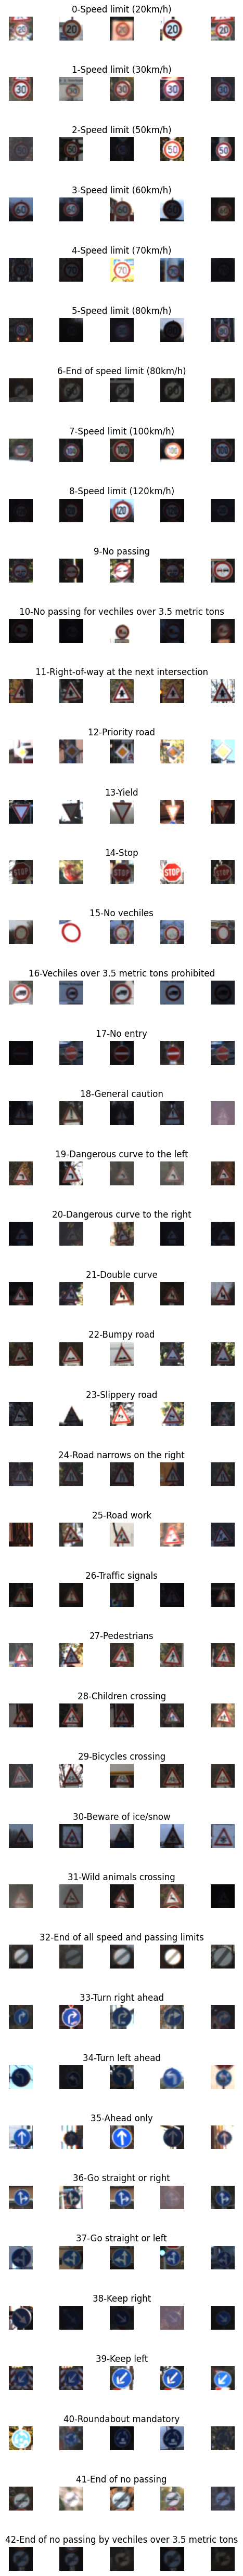

In [ ]:
data = pd.read_csv("german-traffic-signs/signnames.csv")

num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected) - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


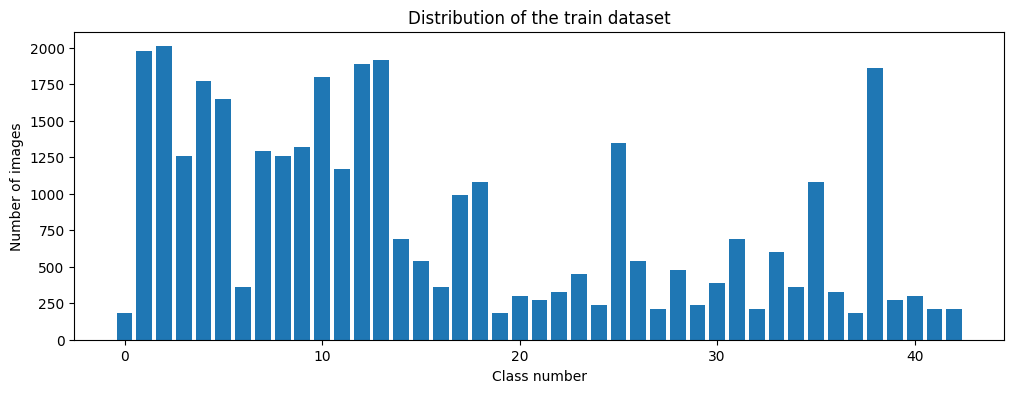

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


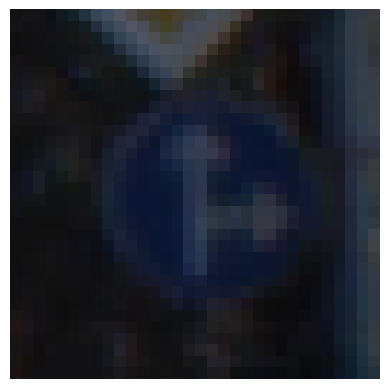

In [ ]:
plt.imshow(x_train[1000])
plt.axis("off")
print(x_train[1000].shape)
print(y_train[1000])

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

(32, 32)


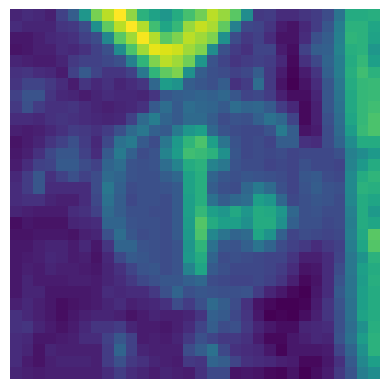

In [ ]:
img = grayscale(x_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


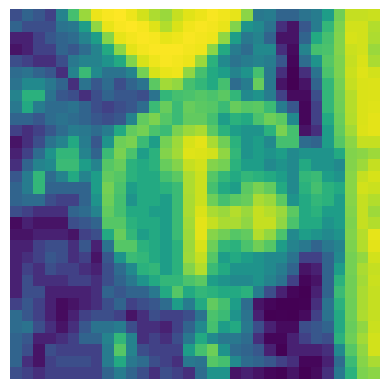

In [ ]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [ ]:
def preprocessing (img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

x_train = np.array(list(map(preprocessing, x_train)))
x_val = np.array(list(map(preprocessing, x_val)))
x_test = np.array(list(map(preprocessing, x_test)))

(34799, 32, 32)


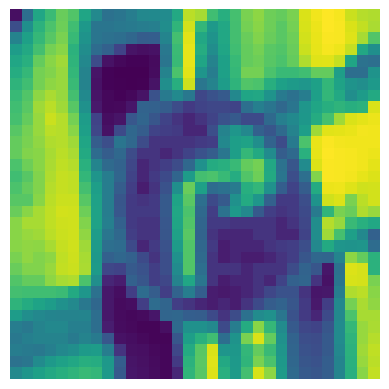

In [ ]:
plt.imshow(x_train[random.randint(0, len(x_train) - 1)])
plt.axis('off')
print(x_train.shape)

In [ ]:
x_train = x_train.reshape(34799, 32, 32, 1)
x_test = x_test.reshape(12630, 32, 32, 1)
x_val = x_val.reshape(4410, 32, 32, 1)

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
#
#datagen = ImageDataGenerator(width_shift_range= 0.1,
#                            height_shift_range= 0.1,
#                             zoom_range= 0.2,
#                             shear_range= 0.1,
#                             rotation_range= 10)
#datagen.fit(x_train)

In [ ]:
#batches = datagen.flow(x_train, y_train, batch_size= 20)
#x_batch, y_batch = next(batches)
#
#fig, axs = plt.subplots(1, 15, figsize= (20, 5))
#fig.tight_layout()
#
#for i in range(15):
#  axs[i].imshow(x_batch[i].reshape(32, 32))
#  axs[i].axis('off')

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(30, (3, 3), activation= 'relu'))
  model.add(Conv2D(30, (3, 3), activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) #.......

  model.add(Flatten())
  model.add(Dense(500, activation= 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  #compiling model
  model.compile(Adam(lr= 0.001), loss= 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model1 = leNet_model()
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#steps_per_epoch = len(x_train)//50

#validation_steps = len(x_test)//50 # if you have validation data

In [ ]:
x_train.size

35634176

In [ ]:
histroy = model1.fit(x_train, y_train, epochs= 10, validation_data=(x_val, y_val), batch_size= 400, verbose= 1, shuffle= 1)

Epoch 1/10
87/87 [==============================] - 14s 46ms/step - loss: 2.4007 - accuracy: 0.3552 - val_loss: 0.7169 - val_accuracy: 0.8077
Epoch 2/10
87/87 [==============================] - 3s 31ms/step - loss: 0.6781 - accuracy: 0.7884 - val_loss: 0.3004 - val_accuracy: 0.9222
Epoch 3/10
87/87 [==============================] - 3s 31ms/step - loss: 0.3726 - accuracy: 0.8847 - val_loss: 0.2018 - val_accuracy: 0.9454
Epoch 4/10
87/87 [==============================] - 3s 31ms/step - loss: 0.2644 - accuracy: 0.9169 - val_loss: 0.1478 - val_accuracy: 0.9580
Epoch 5/10
87/87 [==============================] - 3s 32ms/step - loss: 0.2033 - accuracy: 0.9364 - val_loss: 0.1260 - val_accuracy: 0.9676
Epoch 6/10
87/87 [==============================] - 3s 31ms/step - loss: 0.1693 - accuracy: 0.9462 - val_loss: 0.1021 - val_accuracy: 0.9703
Epoch 7/10
87/87 [==============================] - 3s 31ms/step - loss: 0.1401 - accuracy: 0.9550 - val_loss: 0.0773 - val_accuracy: 0.9771
Epoch 8/10
8

In [ ]:
#histroy = model1.fit_generator(datagen.flow(x_train, y_train, batch_size= 50), steps_per_epoch= 2000, epochs= 10, validation_data= (x_val, y_val), shuffle= 1)

Text(0.5, 0, 'epoch')

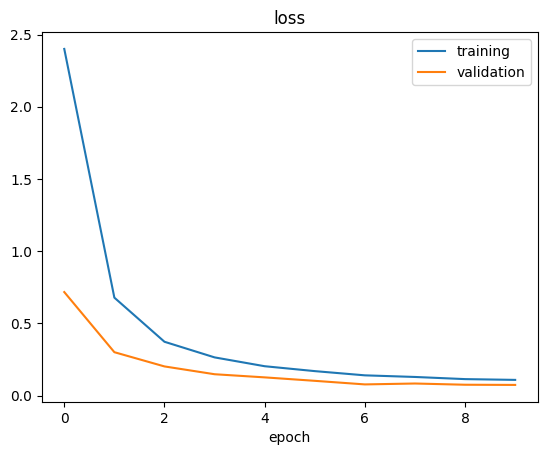

In [ ]:
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

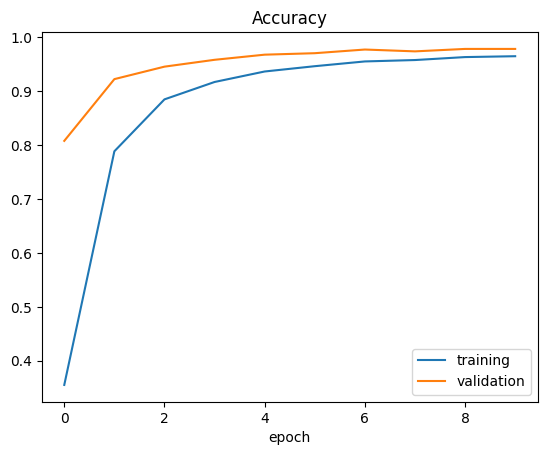

In [ ]:
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model1.evaluate(x_test, y_test, verbose= 0)

print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.12651456892490387
Test Accuracy:  0.9627870321273804


Testing the model

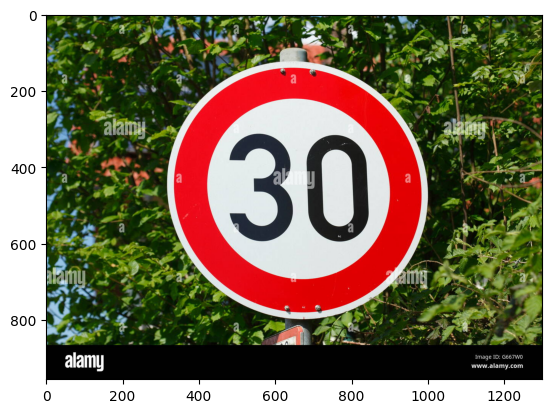

In [ ]:
#fetch image
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


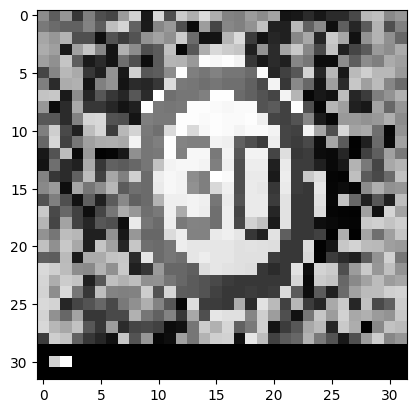

In [ ]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)

In [ ]:
predict_x=model1.predict(img)
classes_x=np.argmax(predict_x,axis=1)

print("predicted sign: ", classes_x)

1/1 [==============================] - 0s 207ms/step
predicted sign:  [1]


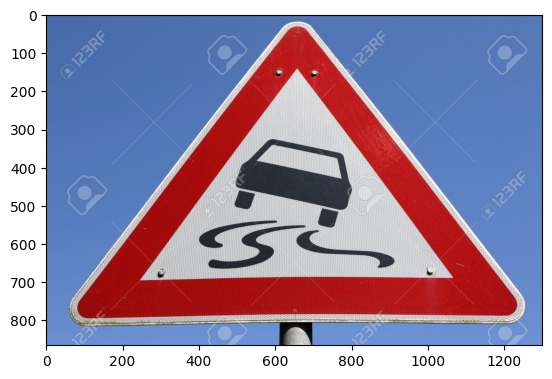

In [ ]:
#fetch image
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)
1/1 [==============================] - 0s 17ms/step
predicted sign:  [23]


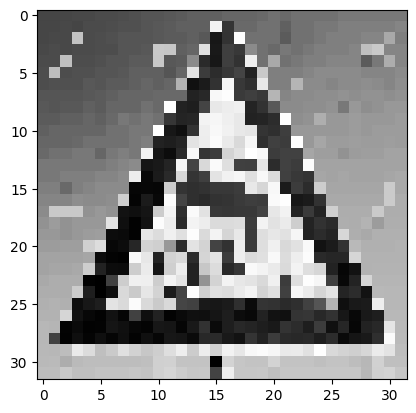

In [ ]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

#Reshape reshape
img = img.reshape(1, 32, 32, 1)

predict_x=model1.predict(img)
classes_x=np.argmax(predict_x,axis=1)

print("predicted sign: ", classes_x)